In [67]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)
pd.options.display.float_format = '{:.2f}'.format

# Bases de datos historicas

In [2]:
dolar=pd.read_excel('dolar.xlsx',index_col=0)
plata=pd.read_excel('plata.xlsx',index_col=0)

# Simulacion de precios

In [3]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [4]:
plata_closes=pd.DataFrame(plata.iloc[0:100,0][::-1])
ret_plata = calc_daily_ret(plata_closes)
# Obtenemos el rendimiento simple
Ri = plata_closes.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu = Ri.mean()[0]
sigma = Ri.std()[0]
r = 0.0208/360
mu,sigma,r

(-0.00119411384505747, 0.010313002084603761, 5.7777777777777776e-05)

In [15]:
ndays = (datetime(2018,12,31).date()-datetime(2018,10,31).date()).days
nscen = 100000
dates = pd.date_range('2018-10-31',periods=ndays).astype('str')
ndays,nscen

(61, 100000)

In [76]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
S0 = plata_closes.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())#Valor presente
#pd.concat([plata_closes,sim_closes]).plot(figsize=(8,6));

In [77]:
spot=plata_closes.iloc[-1]
print('el precio al dia en que se paga la opcion es de ',spot)

el precio al dia en que se paga la opcion es de  Cierre   14.23
Name: 31.10.2018, dtype: float64


In [83]:
strike=14.35
prime=.317
p_L=sim_closes-strike

In [79]:
p_L.iloc[p_L<0]=0
#si el precio es negativo, no se ejerce la opcion

In [80]:
print('la opcion se ejercic en un ',np.count_nonzero(p_L.iloc[-1,:])/len(p_L.iloc[-1,:])*100,'% de las veces')

la opcion se ejercicio en un  47.524 % de las veces


In [81]:
p_L.iloc[-1,:].T-prime

0        1.03
1       -0.32
2        0.85
3       -0.32
4       -0.32
         ... 
99995    1.37
99996    0.34
99997    0.50
99998    1.11
99999    1.52
Name: 2018-12-30, Length: 100000, dtype: float64

# Supuestos
>> La opcion se pactaria con un strike en 14.35 para la opcion que expira en diciembre de este año

>> El negocio necesita de toda la plata del contrato subyacente de la opcion

>> La opcion se pacta al dia 31 de Octubre del 2018

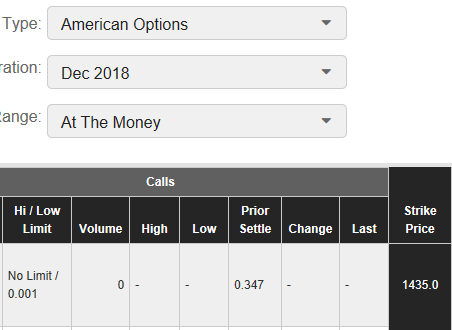



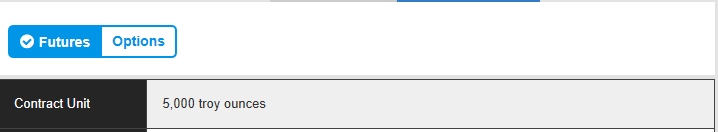

In [52]:
print('de comprarse al dia de hoy el costo seria de $',14.229*5000,' dolares')

de comprarse al dia de hoy el costo seria de $ 71145.0  dolares


In [71]:
print('de comprarse dia a dia la cantidad necesaria asumiendo que cada dia se necesita la misma cantidad el costo promedio seria de $',
      np.mean(np.sum(sim_closes*(5000/ndays),axis=0)),' dolares')


de comprarse dia a dia la cantidad necesaria asumiendo que cada dia se necesita la misma cantidad el costo promedio seria de $ 71393.66228041383  dolares


In [87]:
finales=pd.DataFrame(sim_closes.iloc[-1,:].T)

In [122]:
costo=(finales)
costo=costo*0+strike*5000

In [123]:
costo.loc[((finales-strike)<0)['2018-12-30']]=finales.loc[((finales-strike)<0)['2018-12-30']]*5000

In [132]:
print('de comprarse el call el costo promedio seria de $',np.mean(costo+prime*5000)[0])

de comprarse el call el costo promedio seria de $ 70976.10924464611
